<h2>Fashion MNIST dataset in Keras library</h2>

## Imports

In [1]:
# - TensorFlow
import tensorflow as tf
# - Dataset
from tensorflow.keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D

# Print some stuff
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.1.0


<h2>Load data</h2>

In [2]:
# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

4423680/4422102 [==============================] - 1s 0us/step
Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [3]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


## Linear model

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 3s 50us/sample - loss: 0.6640 - accuracy: 0.7781 - val_loss: 0.5037 - val_accuracy: 0.8267
Epoch 2/6
54000/54000 [==============================] - 2s 39us/sample - loss: 0.4883 - accuracy: 0.8354 - val_loss: 0.4657 - val_accuracy: 0.8393
Epoch 3/6
54000/54000 [==============================] - 2s 37us/sample - loss: 0.4546 - accuracy: 0.8459 - val_loss: 0.4416 - val_accuracy: 0.8462
Epoch 4/6
54000/54000 [==============================] - 2s 36us/sample - loss: 0.4367 - accuracy: 0.8497 - val_loss: 0.4329 - val_accuracy: 0.8485
Epoch 5/6
54000/54000 [==============================] - 2s 41us/sample - loss: 0.4245 - accuracy: 0.8544 - val_loss: 0.4230 - val_accuracy: 0.8522
Epoch 6/6
54000/54000 [==============================] - 2s 43us/sample - loss: 0.4176 - accuracy: 0.8565 - val_loss: 0.4193 - val_accuracy: 0.8567

Test Accuracy: 84.26%
Time elapsed: 13.85 sec


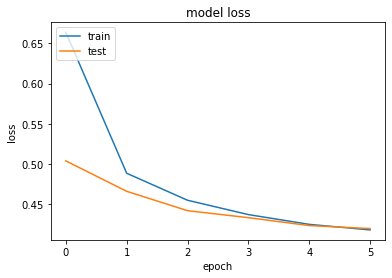

In [4]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = lin_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN model

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 4s 71us/sample - loss: 0.5884 - accuracy: 0.7915 - val_loss: 0.4188 - val_accuracy: 0.8407
Epoch 2/8
54000/54000 [==============================] - 3s 62us/sample - loss: 0.4159 - accuracy: 0.8492 - val_loss: 0.3664 - val_accuracy: 0.8663
Epoch 3/8
54000/54000 [==============================] - 3s 59us/sample - loss: 0.3826 - accuracy: 0.8607 - val_loss: 0.3527 - val_accuracy: 0.8707
Epoch 4/8
54000/54000 [==============================] - 3s 62us/sample - loss: 0.3578 - accuracy: 0.8695 - val_loss: 0.3362 - val_accuracy: 0.8760
Epoch 5/8
54000/54000 [==============================] - 3s 63us/sample - loss: 0.3391 - accuracy: 0.8746 - val_loss: 0.3285 - val_accuracy: 0.8805
Epoch 6/8
54000/54000 [==============================] - 3s 58us/sample - loss: 0.3287 - accuracy: 0.8797 - val_loss: 0.3208 - val_accuracy: 0.8813
Epoch 7/8
54000/54000 [==============================] - 3s 60u

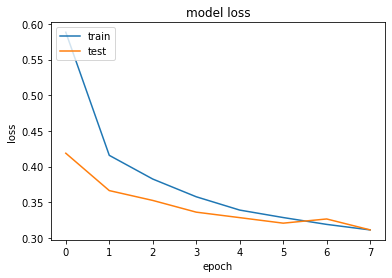

In [5]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ConvNet model

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 31s 567us/sample - loss: 0.5501 - accuracy: 0.7997 - val_loss: 0.3554 - val_accuracy: 0.8705
Epoch 2/8
54000/54000 [==============================] - 29s 546us/sample - loss: 0.3678 - accuracy: 0.8669 - val_loss: 0.3087 - val_accuracy: 0.8885
Epoch 3/8
54000/54000 [==============================] - 30s 552us/sample - loss: 0.3245 - accuracy: 0.8818 - val_loss: 0.2708 - val_accuracy: 0.9012
Epoch 4/8
54000/54000 [==============================] - 29s 537us/sample - loss: 0.2931 - accuracy: 0.8912 - val_loss: 0.2545 - val_accuracy: 0.9018
Epoch 5/8
54000/54000 [==============================] - 29s 529us/sample - loss: 0.2749 - accuracy: 0.8978 - val_loss: 0.2391 - val_accuracy: 0.9062
Epoch 6/8
54000/54000 [==============================] - 30s 547us/sample - loss: 0.2584 - accuracy: 0.9051 - val_loss: 0.2308 - val_accuracy: 0.9143
Epoch 7/8
54000/54000 [============================

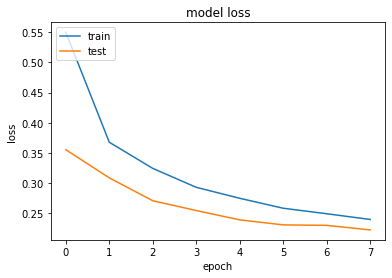

In [6]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(64, (3,3), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="relu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Confusion matrix</h2>

In [7]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[900   0  16  22   4   1  47   0  10   0]
 [  0 981   0  12   2   0   4   0   1   0]
 [ 16   1 885  11  43   0  44   0   0   0]
 [ 10   5   6 949  15   0  14   0   1   0]
 [  0   1  71  32 862   0  33   0   1   0]
 [  0   0   0   0   0 983   0  12   0   5]
 [140   2  79  43  97   0 633   0   6   0]
 [  0   0   0   0   0   4   0 952   0  44]
 [  2   1   1   3   2   1   0   2 988   0]
 [  1   0   0   0   0   4   0  22   0 973]]


<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


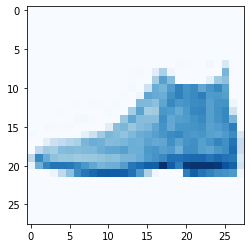

Predicted: Pullover
Actual: Pullover


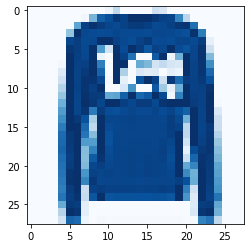

Predicted: Trouser
Actual: Trouser


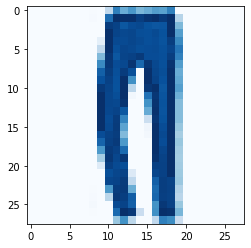

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()